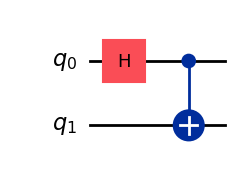

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [7]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

Control array (0s and 1s): [1 1 0 1]
        ┌───┐┌───┐ ░ ┌─┐         
   q_0: ┤ H ├┤ X ├─░─┤M├─────────
        ├───┤├───┤ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤ X ├─░──╫─┤M├──────
        ├───┤├───┤ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤ X ├─░──╫──╫─┤M├───
        ├───┤├───┤ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤ X ├─░──╫──╫──╫─┤M├
        └───┘└───┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════╩══╩══╩══╩═
                      0  1  2  3 


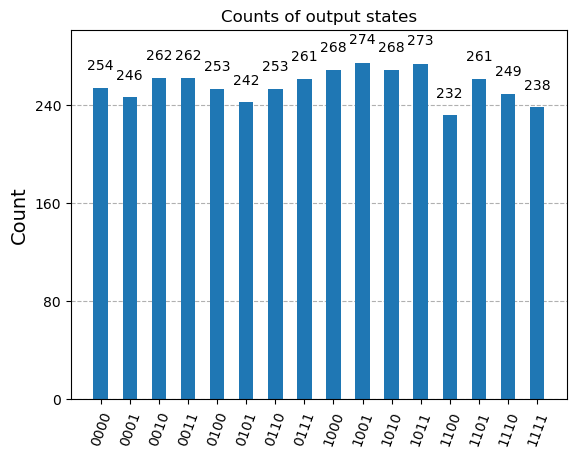

In [40]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Define the number of qubits
num_qubits = 4  # Adjust as needed

# Create a quantum circuit with num_qubits qubits
qc = QuantumCircuit(num_qubits)

# Generate a random NumPy array (0s and 1s) that will control CNOT application
control_array = np.random.randint(0, 2, size=(num_qubits))
print(f"Control array (0s and 1s): {control_array}")

# Apply Hadamard gate to create superposition
for i in range(num_qubits):
    qc.h(i)

# Apply CNOT gates based on the NumPy array
# for i in range(num_qubits - 1):  # Avoid out-of-bounds errors
#     # if control_array[i] in [0, 1]:
#     qc.x(i)  # Apply CNOT with control on qubit i, target on qubit i+1

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

# Measure the circuit to see the effect of the applied gates
qc.measure_all()

# Draw the circuit
print(qc.draw())

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=4096)
result = job.result()

# Get the counts of the output states
counts = result.get_counts()

plot_histogram(counts, title='Counts of output states')


In [163]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from copy import deepcopy

num_qubits = 4

key = np.random.randint(0, 2, size=(num_qubits))
a = np.random.randint(0, 2, size=(num_qubits))
b = np.random.randint(0, 2, size=(num_qubits))
b_prime = np.random.randint(0, 2, size=(num_qubits))
mathing_bases = np.where(b == b_prime)[0]

qc_alice = QuantumCircuit(num_qubits)
qc_bob = QuantumCircuit(num_qubits)

for i in range(num_qubits):
    if a[i] == 1:
        qc_alice.x(i)
qc_alice.barrier()

for i in range(num_qubits):
    if b[i] == 1:
        qc_alice.h(i)
qc_alice.barrier()

qc_bob = deepcopy(qc_alice)

for i in range(num_qubits):
    if b_prime[i] == 1:
        qc_bob.h(i)
qc_bob.barrier()

qc_alice.measure_all()
qc_bob.measure_all()

print(qc_alice.draw())
print(qc_bob.draw())

backend = Aer.get_backend('qasm_simulator')

num_shots = 1
job = backend.run(qc_alice, shots=num_shots)
result = job.result()
counts_alice = result.get_counts()

job = backend.run(qc_bob, shots=num_shots)
result = job.result()
counts_bob = result.get_counts()


print(f'a:  {a}')
print(f'b:  {b}')
print(f'b\': {b_prime}')

print(f'Matching bases: {mathing_bases}')
print(f"Alice: {counts_alice}")
print(f"Bob: {counts_bob}")

         ░ ┌───┐ ░  ░ ┌─┐         
   q_0: ─░─┤ H ├─░──░─┤M├─────────
         ░ └───┘ ░  ░ └╥┘┌─┐      
   q_1: ─░───────░──░──╫─┤M├──────
         ░ ┌───┐ ░  ░  ║ └╥┘┌─┐   
   q_2: ─░─┤ H ├─░──░──╫──╫─┤M├───
         ░ ├───┤ ░  ░  ║  ║ └╥┘┌─┐
   q_3: ─░─┤ H ├─░──░──╫──╫──╫─┤M├
         ░ └───┘ ░  ░  ║  ║  ║ └╥┘
meas: 4/═══════════════╩══╩══╩══╩═
                       0  1  2  3 
         ░ ┌───┐ ░ ┌───┐ ░  ░ ┌─┐         
   q_0: ─░─┤ H ├─░─┤ H ├─░──░─┤M├─────────
         ░ └───┘ ░ └───┘ ░  ░ └╥┘┌─┐      
   q_1: ─░───────░───────░──░──╫─┤M├──────
         ░ ┌───┐ ░       ░  ░  ║ └╥┘┌─┐   
   q_2: ─░─┤ H ├─░───────░──░──╫──╫─┤M├───
         ░ ├───┤ ░       ░  ░  ║  ║ └╥┘┌─┐
   q_3: ─░─┤ H ├─░───────░──░──╫──╫──╫─┤M├
         ░ └───┘ ░       ░  ░  ║  ║  ║ └╥┘
meas: 4/═══════════════════════╩══╩══╩══╩═
                               0  1  2  3 
a:  [0 0 0 0]
b:  [1 0 1 1]
b': [1 0 0 0]
Matching bases: [0 1]
Alice: {'0000': 1}
Bob: {'1000': 1}


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from copy import deepcopy
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector

store = []

num_qubits = 8

# Generate random bits and bases
key = np.random.randint(0, 2, size=(num_qubits))
a = np.random.randint(0, 2, size=(num_qubits))  # Alice's key
b = np.random.randint(0, 2, size=(num_qubits))  # Alice's basis
b_prime = np.random.randint(0, 2, size=(num_qubits))  # Bob's basis

for iterator in range(10000):
    a = np.array([0, 0, 0, 0, 1, 1, 1, 1])
    b = np.array([0, 0, 1, 1, 0, 0, 1, 1])
    b_prime = np.array([0, 1, 0, 1, 0, 1, 0, 1])

    # Find matching bases for Alice and Bob
    matching_bases = np.where(b == b_prime)[0]

    # Alice's quantum circuit
    qc_alice = QuantumCircuit(num_qubits)

    # Apply X-gates according to Alice's key (a) before basis selection
    for i in range(num_qubits):
        if a[i] == 1:
            qc_alice.x(i)

    qc_alice.barrier()

    # Bob's quantum circuit
    qc_bob = deepcopy(qc_alice)  # Start with Alice's circuit

    # Apply H-gates according to Alice's basis (b)
    for i in range(num_qubits):
        if b[i] == 1:
            qc_bob.h(i)

    qc_bob.barrier()

    # Bob applies H-gates according to his basis (b_prime)
    for i in range(num_qubits):
        if b_prime[i] == 1:
            qc_bob.h(i)

    qc_bob.barrier()

    # Measure all qubits
    qc_alice.measure_all()
    qc_bob.measure_all()

    # Print circuits
    # print("Alice's Circuit:")
    # print(qc_alice.draw())
    # print("\nBob's Circuit:")
    # print(qc_bob.draw())

    # Run the circuits on a simulator
    backend = Aer.get_backend('qasm_simulator')

    # Number of shots
    num_shots = 1

    # Alice's results
    job_alice = backend.run(qc_alice, shots=num_shots)
    result_alice = job_alice.result()
    counts_alice = result_alice.get_counts()

    # Bob's results
    job_bob = backend.run(qc_bob, shots=num_shots)
    result_bob = job_bob.result()
    counts_bob = result_bob.get_counts()

    # Output the results
    # print(f'a:  {a}')
    # print(f'b:  {b}')
    # print(f'b\': {b_prime}')
    # print(f'Matching bases: {matching_bases}')
    # print(f"Alice's Counts: {counts_alice}")
    # print(f"Bob's Counts: {counts_bob}")

    alice_result = np.array([elem for elem in list(counts_alice.keys())[0]])
    bob_result = np.array([elem for elem in list(counts_bob.keys())[0]])

    store.append(np.all(np.isin([0, 3, 4, 7], np.where(alice_result == bob_result)[0])))

print(np.all(store))
# print(f"Alice: {alice_result}")
# print(f"Bob: {bob_result}")
# print(f"Mathing indexes: {np.where(alice_result == bob_result)[0]}")
# print(f"Required match: {np.all(np.isin([0, 3, 4, 7], np.where(alice_result == bob_result)[0]))}")


True


In [ ]:
alice_result = np.array([elem for elem in list(counts_alice.keys())[0]])
bob_result = np.array([elem for elem in list(counts_bob.keys())[0]])

# print(f"Alice: {alice_result}")
# print(f"Bob: {bob_result}")
print(f"Mathing indexes: {np.where(alice_result == bob_result)[0]}")

Mathing indexes: [3 5 7]
